In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\mehaq\OneDrive\Documents\My work\DIGITISATION OF WOOL DATA - Sheet13.csv")

In [4]:
df.head()

,BRAND NUMBER,BREED,SEX,DOB,DATE OF SAMPLING,AGE,DATE OF LAST SHEARING,AREA,DISTRICT,WOOL YIELD IN %,FIBRE DIAMETER IN MICRONS,STAPLE LENGTH IN CMS,CRIMPS PER INCH,MEDULATION IN %,FARM/FIELD,YEAR,SHEDDING,COLOR
0,4H 1,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,20.0,2.4,13.3,NIL,FARM,2015,NO,NaN
1,4H 2,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,20.0,2.4,13.7,NIL,FARM,2015,NO,NaN
2,4H 3,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,67.4,20.8,2.3,11.3,NIL,FARM,2015,NO,NaN
3,4H 5,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,64.7,20.5,4.3,11.7,NIL,FARM,2015,NO,NaN
4,4H 6,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,60.6,20.0,3,14,NIL,FARM,2015,NO,NaN


In [5]:
df.shape

(13607, 18)

In [6]:
df.columns

Index(['BRAND NUMBER', 'BREED', 'SEX', 'DOB', 'DATE OF SAMPLING', 'AGE',
       'DATE OF LAST SHEARING', 'AREA', 'DISTRICT', 'WOOL YIELD IN %',
       'FIBRE DIAMETER IN MICRONS', 'STAPLE LENGTH IN CMS', 'CRIMPS PER INCH',
       'MEDULATION IN %', 'FARM/FIELD', 'YEAR', 'SHEDDING', 'COLOR'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13607 entries, 0 to 13606
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BRAND NUMBER               13607 non-null  object 
 1   BREED                      13607 non-null  object 
 2   SEX                        13607 non-null  object 
 3   DOB                        13597 non-null  object 
 4   DATE OF SAMPLING           13607 non-null  object 
 5   AGE                        13525 non-null  float64
 6   DATE OF LAST SHEARING      12714 non-null  object 
 7   AREA                       13607 non-null  object 
 8   DISTRICT                   13607 non-null  object 
 9   WOOL YIELD IN %            13417 non-null  float64
 10  FIBRE DIAMETER IN MICRONS  13607 non-null  float64
 11  STAPLE LENGTH IN CMS       13607 non-null  object 
 12  CRIMPS PER INCH            13607 non-null  object 
 13  MEDULATION IN %            13581 non-null  obj

In [8]:
# quick summary of all columns 
summary = []

for col in df.columns:
    summary.append({
        'Column': col,
        'Data Type': df[col].dtype,
        'Missing Values': df[col].isnull().sum(),
        'Unique Values': df[col].nunique(),
        'non null values':df[col].count()
    })

profile_df = pd.DataFrame(summary)
profile_df

,Column,Data Type,Missing Values,Unique Values,non null values
0,BRAND NUMBER,object,0,13172,13607
1,BREED,object,0,28,13607
2,SEX,object,0,2,13607
3,DOB,object,10,94,13597
4,DATE OF SAMPLING,object,0,25,13607
5,AGE,float64,82,44,13525
6,DATE OF LAST SHEARING,object,893,41,12714
7,AREA,object,0,8,13607
8,DISTRICT,object,0,8,13607
9,WOOL YIELD IN %,float64,190,311,13417


In [9]:
# Identify non-numeric entries
non_numeric = df[pd.to_numeric(df['STAPLE LENGTH IN CMS'], errors='coerce').isna()]['STAPLE LENGTH IN CMS'].unique()
print("Non-numeric values found in Staple Length:", non_numeric)

Non-numeric values found in Staple Length: ['3. 2' '1 . 8']


In [10]:
df['STAPLE LENGTH IN CMS'].apply(type).value_counts()

STAPLE LENGTH IN CMS
<class 'str'>    13607
Name: count, dtype: int64

In [11]:
# This filters for any value that isn't a simple number (e.g., contains a space)
dirty_mask = df['STAPLE LENGTH IN CMS'].str.contains(' ', na=False)
df[dirty_mask][['BRAND NUMBER', 'STAPLE LENGTH IN CMS']]

,BRAND NUMBER,STAPLE LENGTH IN CMS
6907,2V 54,3. 2
6937,2V 89,1 . 8


In [12]:
# Check the first value of the column
first_val = df['STAPLE LENGTH IN CMS'].iloc[0]
print(f"Value: {first_val}")
print(f"Actual Type: {type(first_val)}")

Value: 2.4
Actual Type: <class 'str'>


In [13]:
# 1. Strip all leading/trailing and middle spaces
df['STAPLE LENGTH IN CMS'] = df['STAPLE LENGTH IN CMS'].astype(str).str.replace(' ', '')

# 2. Convert to float (numeric)
df['STAPLE LENGTH IN CMS'] = pd.to_numeric(df['STAPLE LENGTH IN CMS'], errors='coerce')

# 3. Verify the fix
print(f"New Data Type: {df['STAPLE LENGTH IN CMS'].dtype}")
print(df['STAPLE LENGTH IN CMS'].describe())

New Data Type: float64
count    13607.000000
mean         3.606288
std          1.327623
min          0.300000
25%          3.000000
50%          3.500000
75%          4.200000
max         69.000000
Name: STAPLE LENGTH IN CMS, dtype: float64


In [14]:
# Check the first value of the column
first_val = df['STAPLE LENGTH IN CMS'].iloc[0]
print(f"Value: {first_val}")
print(f"Actual Type: {type(first_val)}")

Value: 2.4
Actual Type: <class 'numpy.float64'>


In [15]:
# Check the distribution of data types in the Crimps column
print("Data Type Distribution for CRIMPS PER INCH:")
print(df['CRIMPS PER INCH'].apply(type).value_counts())

Data Type Distribution for CRIMPS PER INCH:
CRIMPS PER INCH
<class 'str'>    13607
Name: count, dtype: int64


In [16]:
# Find non-numeric unique values
non_numeric_crimps = df[pd.to_numeric(df['CRIMPS PER INCH'], errors='coerce').isna()]['CRIMPS PER INCH'].unique()
print("Non-numeric values found in Crimps:", non_numeric_crimps)

Non-numeric values found in Crimps: ['.9.3' 'NIL' '11..7' '12. 7' 'DEFORMED']


In [17]:
# List of specific problematic values
problem_crimps = ['.9.3', 'NIL', '11..7', '12. 7', 'DEFORMED']

# Filter and display
df[df['CRIMPS PER INCH'].isin(problem_crimps)][['BRAND NUMBER', 'BREED', 'CRIMPS PER INCH']]

,BRAND NUMBER,BREED,CRIMPS PER INCH
707,4R 04,KM,.9.3
2367,7M 290,KM,NIL
6064,2P 79,AMX,11..7
9319,6J 151,KM,NIL
11505,15J 73,FB,NIL
11577,15M 21,FB,12. 7
11624,15M 81,FB,NIL
11629,15M 86,FB,NIL
11631,15M 88,FB,NIL
12620,12I 34,FB,DEFORMED


In [18]:
import numpy as np

def clean_crimps(val):
    if val is None or str(val).lower() == 'nan':
        return np.nan
    
    # Convert to string and handle specific cases
    val_str = str(val).strip().upper()
    
    if val_str == 'NIL':
        return 0.0
    if val_str == 'DEFORMED':
        return np.nan
    
    # Fix typos: remove spaces and handle double/leading dots
    # This replaces '12. 7' with '12.7' and handles '..7' or '.9.3' logic
    cleaned = val_str.replace(' ', '')
    
    # If there are multiple dots, we take the first two parts
    if cleaned.count('.') > 1:
        parts = cleaned.split('.')
        # Joins the first part and the second part with a single dot (e.g., '.9.3' -> '9.3')
        # We filter out empty strings in case it starts with a dot
        parts = [p for p in parts if p] 
        cleaned = ".".join(parts[:2])
        
    try:
        return float(cleaned)
    except ValueError:
        return np.nan

# Apply the function to the column
df['CRIMPS PER INCH'] = df['CRIMPS PER INCH'].apply(clean_crimps)

# Verify the results
print("Cleaned Unique Values Sample:", df['CRIMPS PER INCH'].unique()[:10])
print("Remaining Missing Values:", df['CRIMPS PER INCH'].isna().sum())

Cleaned Unique Values Sample: [13.3 13.7 11.3 11.7 14.  12.3 12.7 14.3  9.7 13. ]
Remaining Missing Values: 2


In [19]:
# Identify non-numeric entries in Medullation
non_numeric_med = df[pd.to_numeric(df['MEDULATION IN %'], errors='coerce').isna()]['MEDULATION IN %'].unique()

print("Non-numeric values found in Medullation:")
print(non_numeric_med)

Non-numeric values found in Medullation:
['NIL' 'NIL ' 'shuding' nan]


In [20]:
print("\nData Type Distribution:")
print(df['MEDULATION IN %'].apply(type).value_counts())



Data Type Distribution:
MEDULATION IN %
<class 'str'>      13581
<class 'float'>       26
Name: count, dtype: int64


In [21]:
# Get all unique values sorted to easily spot patterns or anomalies
unique_medulation = df['MEDULATION IN %'].astype(str).unique()
unique_medulation.sort()

print(f"Total Unique Entries: {len(unique_medulation)}")
print("-" * 30)
print(unique_medulation)


Total Unique Entries: 180
------------------------------
['0.01' '0.06' '0.61' '0.62' '0.63' '0.65' '0.7' '0.8' '0.9' '0.99' '1.06'
 '1.07' '1.13' '1.18' '1.19' '1.2' '1.21' '1.22' '1.24' '1.25' '1.27'
 '1.28' '1.4' '1.5' '1.6' '1.63' '1.7' '1.8' '1.88' '1.94' '1.99' '10'
 '10.05' '10.1' '10.2' '10.4' '10.5' '10.6' '10.69' '10.7' '10.8' '11.1'
 '11.2' '11.3' '11.4' '11.5' '11.6' '11.7' '11.8' '11.9' '12' '12.5'
 '12.8' '12.9' '13.6' '14.1' '14.2' '14.3' '14.6' '14.9' '15' '15.2'
 '15.8' '16.1' '16.6' '17' '17.3' '17.5' '17.6' '17.91' '19.2' '19.3'
 '19.8' '2' '2.1' '2.13' '2.2' '2.3' '2.31' '2.39' '2.4' '2.5' '2.54'
 '2.6' '2.7' '2.8' '2.9' '20.8' '21.4' '21.5' '22.91' '23.2' '23.21'
 '23.45' '23.91' '24.2' '24.5' '24.6' '26.4' '28' '3' '3.1' '3.16' '3.2'
 '3.3' '3.4' '3.5' '3.59' '3.6' '3.61' '3.7' '3.74' '3.8' '3.9' '32' '39'
 '4' '4.1' '4.18' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '4.91'
 '42.5' '5' '5.1' '5.2' '5.3' '5.32' '5.4' '5.5' '5.6' '5.7' '5.8' '5.82'
 '5.9' '50' '

In [22]:
def clean_medullation(value):
    val = str(value).lower().strip()
    
    # 1. Handle NIL or empty strings
    if val in ['nil', '', 'nan', 'none']:
        return 0.0
    
    # 2. Handle categorical "leaks" (FARM, shuding)
    # If the value contains letters, it's likely a mistake
    if any(c.isalpha() for c in val):
        return np.nan
    
    # 3. Final conversion
    try:
        return float(val)
    except ValueError:
        return np.nan

# Apply the cleaning
df['MEDULATION IN %'] = df['MEDULATION IN %'].apply(clean_medullation)

# Verify the result
print(f"Medullation cleaned. Remaining NaNs: {df['MEDULATION IN %'].isna().sum()}")

Medullation cleaned. Remaining NaNs: 2


In [23]:
df.head()

,BRAND NUMBER,BREED,SEX,DOB,DATE OF SAMPLING,AGE,DATE OF LAST SHEARING,AREA,DISTRICT,WOOL YIELD IN %,FIBRE DIAMETER IN MICRONS,STAPLE LENGTH IN CMS,CRIMPS PER INCH,MEDULATION IN %,FARM/FIELD,YEAR,SHEDDING,COLOR
0,4H 1,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,20.0,2.4,13.3,0.0,FARM,2015,NO,NaN
1,4H 2,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,20.0,2.4,13.7,0.0,FARM,2015,NO,NaN
2,4H 3,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,67.4,20.8,2.3,11.3,0.0,FARM,2015,NO,NaN
3,4H 5,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,64.7,20.5,4.3,11.7,0.0,FARM,2015,NO,NaN
4,4H 6,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,60.6,20.0,3.0,14.0,0.0,FARM,2015,NO,NaN


In [24]:
# Show the rows where Medullation ended up as NaN
missing_med = df[df['MEDULATION IN %'].isna()]

# We want to see what the 'BRAND NUMBER' and 'BREED' were for context
print(f"Total NaNs found: {len(missing_med)}")
missing_med[['BRAND NUMBER', 'BREED', 'MEDULATION IN %']]

Total NaNs found: 2


,BRAND NUMBER,BREED,MEDULATION IN %
824,4S 161,F1(IMPXFB),NaN
834,4S 175,F1(IMPXFB),NaN


In [25]:
# Identify the strange lengths
shearing_str = df['DATE OF LAST SHEARING'].astype(str)

print("--- The 2-character values ---")
print(shearing_str[shearing_str.map(len) == 2].unique())

print("\n--- The 9-character values ---")
print(shearing_str[shearing_str.map(len) == 9].unique())

--- The 2-character values ---
['NK']

--- The 9-character values ---
['UNSHEARED']


In [26]:
import pandas as pd

# 1. Define the correct format: %y (Year) - %b (Month)
# This matches '15-Mar' perfectly
correct_format = '%y-%b'

# 2. Convert the columns
df['SAMPLING_DT'] = pd.to_datetime(df['DATE OF SAMPLING'], format=correct_format, errors='coerce')
df['SHEARING_DT'] = pd.to_datetime(df['DATE OF LAST SHEARING'], format=correct_format, errors='coerce')
df['DOB_DT'] = pd.to_datetime(df['DOB'], format=correct_format, errors='coerce')

# 3. Handle the 'UNSHEARED' logic
# (If 'UNSHEARED' sheep exist, use their Date of Birth instead)
unsheared_mask = df['DATE OF LAST SHEARING'].astype(str).str.contains('UNSHEARED', case=False, na=False)
df.loc[unsheared_mask, 'SHEARING_DT'] = df.loc[unsheared_mask, 'DOB_DT']

# 4. Calculate the Growth Interval in Months
# We use a robust subtraction method
def calculate_months(row):
    if pd.isna(row['SAMPLING_DT']) or pd.isna(row['SHEARING_DT']):
        return None
    return (row['SAMPLING_DT'].year - row['SHEARING_DT'].year) * 12 + (row['SAMPLING_DT'].month - row['SHEARING_DT'].month)

df['GROWTH_INTERVAL_MONTHS'] = df.apply(calculate_months, axis=1)

# 5. Final verification
print("--- Final Conversion Report ---")
print(f"Sampling Dates Parsed: {df['SAMPLING_DT'].notna().sum()}")
print(f"Shearing Dates Parsed: {df['SHEARING_DT'].notna().sum()}")
print(f"Successful Intervals: {df['GROWTH_INTERVAL_MONTHS'].notna().sum()}")

--- Final Conversion Report ---
Sampling Dates Parsed: 13607
Shearing Dates Parsed: 11903
Successful Intervals: 11903


In [27]:
neg_count = (df['GROWTH_INTERVAL_MONTHS'] < 0).sum()
print(f"Sheep with negative growth intervals: {neg_count}")

if neg_count > 0:
    print("Top 5 errors:")
    print(df[df['GROWTH_INTERVAL_MONTHS'] < 0][['SAMPLING_DT', 'SHEARING_DT', 'GROWTH_INTERVAL_MONTHS']].head())

Sheep with negative growth intervals: 0


In [28]:
df.head()

,BRAND NUMBER,BREED,SEX,DOB,DATE OF SAMPLING,AGE,DATE OF LAST SHEARING,AREA,DISTRICT,WOOL YIELD IN %,...,CRIMPS PER INCH,MEDULATION IN %,FARM/FIELD,YEAR,SHEDDING,COLOR,SAMPLING_DT,SHEARING_DT,DOB_DT,GROWTH_INTERVAL_MONTHS
0,4H 1,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,...,13.3,0.0,FARM,2015,NO,NaN,2015-03-01,2014-09-01,2013-10-01,6.0
1,4H 2,KM,MALE,13-Oct,15-Mar,17.0,14-Sep,DACHIGAM,SRINAGAR,60.7,...,13.7,0.0,FARM,2015,NO,NaN,2015-03-01,2014-09-01,2013-10-01,6.0
2,4H 3,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,67.4,...,11.3,0.0,FARM,2015,NO,NaN,2015-03-01,2014-09-01,2013-11-01,6.0
3,4H 5,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,64.7,...,11.7,0.0,FARM,2015,NO,NaN,2015-03-01,2014-09-01,2013-11-01,6.0
4,4H 6,KM,MALE,13-Nov,15-Mar,16.0,14-Sep,DACHIGAM,SRINAGAR,60.6,...,14.0,0.0,FARM,2015,NO,NaN,2015-03-01,2014-09-01,2013-11-01,6.0


In [29]:
df.tail(20)

,BRAND NUMBER,BREED,SEX,DOB,DATE OF SAMPLING,AGE,DATE OF LAST SHEARING,AREA,DISTRICT,WOOL YIELD IN %,...,CRIMPS PER INCH,MEDULATION IN %,FARM/FIELD,YEAR,SHEDDING,COLOR,SAMPLING_DT,SHEARING_DT,DOB_DT,GROWTH_INTERVAL_MONTHS
13587,12X 89,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,60.0,...,11.0,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13588,12X 91,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,59.8,...,10.7,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13589,12X 91 ii,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,58.3,...,9.7,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13590,12X 92,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,58.3,...,14.7,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13591,12X 94,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,60.0,...,14.3,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13592,12X 95,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,60.0,...,15.0,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13593,12X 96,F1(IMPXFB),FEMALE,24-Feb,25-Feb,12.0,24-Sep,HARDUSHIVA,BARAMULLA,60.2,...,9.3,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-02-01,5.0
13594,12X 97,F1(IMPXFB),FEMALE,24-Mar,25-Feb,11.0,24-Sep,HARDUSHIVA,BARAMULLA,60.0,...,13.7,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-03-01,5.0
13595,12X 98,F1(IMPXFB),FEMALE,24-Mar,25-Feb,11.0,24-Sep,HARDUSHIVA,BARAMULLA,60.1,...,14.3,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-03-01,5.0
13596,12X 99,F1(IMPXFB),FEMALE,24-Mar,25-Feb,11.0,24-Sep,HARDUSHIVA,BARAMULLA,58.4,...,15.7,0.0,FARM,2025,NO,NaN,2025-02-01,2024-09-01,2024-03-01,5.0


--- Growth Interval Statistics ---
count    11903.000000
mean         5.187600
std          1.092207
min          2.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: GROWTH_INTERVAL_MONTHS, dtype: float64

Missing values: 1704 (12.52%)


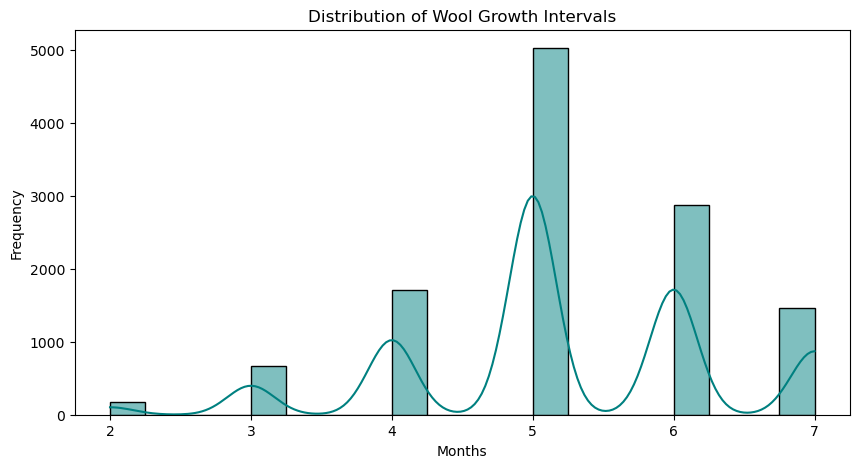

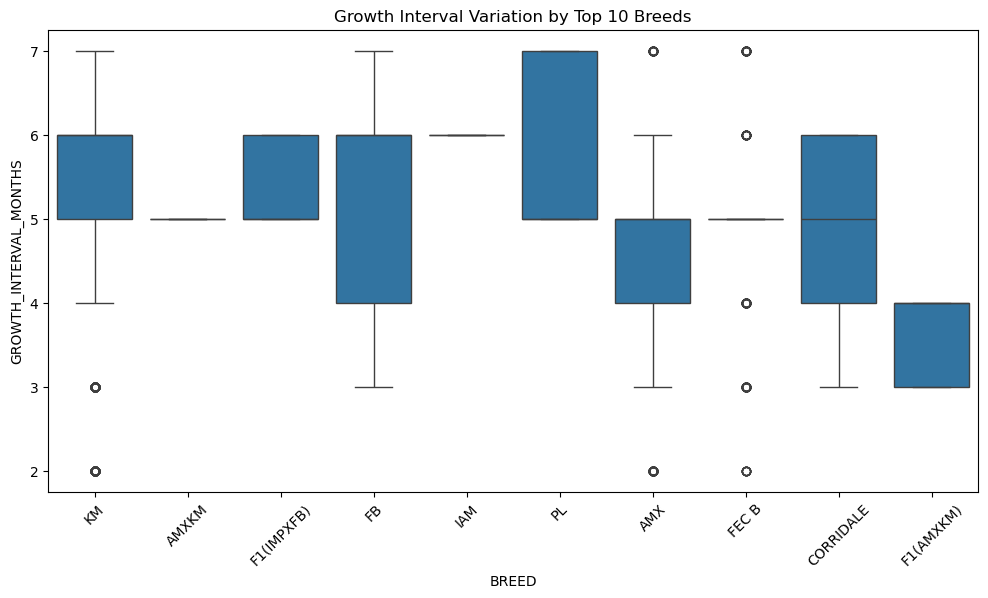


Potential Outliers detected: 0 rows


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Statistical Summary
print("--- Growth Interval Statistics ---")
print(df['GROWTH_INTERVAL_MONTHS'].describe())

# 2. Check for missing values (The 1,704 we discussed)
missing = df['GROWTH_INTERVAL_MONTHS'].isna().sum()
print(f"\nMissing values: {missing} ({round(missing/len(df)*100, 2)}%)")

# 3. Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['GROWTH_INTERVAL_MONTHS'].dropna(), bins=20, kde=True, color='teal')
plt.title('Distribution of Wool Growth Intervals')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

# 

# 4. Boxplot by Breed (Top 10 most frequent breeds)
top_breeds = df['BREED'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='BREED', y='GROWTH_INTERVAL_MONTHS', data=df[df['BREED'].isin(top_breeds)])
plt.xticks(rotation=45)
plt.title('Growth Interval Variation by Top 10 Breeds')
plt.show()

# 

# 5. Outlier Detection: Identify rows with unusual intervals
# Typically, wool is sheared every 6 or 12 months. 
# Anything over 18 months or under 1 month might be a data entry error.
outliers = df[(df['GROWTH_INTERVAL_MONTHS'] > 18) | (df['GROWTH_INTERVAL_MONTHS'] < 1)]
print(f"\nPotential Outliers detected: {len(outliers)} rows")
if not outliers.empty:
    print(outliers[['BREED', 'DATE OF SAMPLING', 'DATE OF LAST SHEARING', 'GROWTH_INTERVAL_MONTHS']].head())

In [31]:
import pandas as pd

# 1. Statistical Summary
print("--- Growth Interval Summary ---")
print(df['GROWTH_INTERVAL_MONTHS'].describe())

# 2. View Unique Values (Sorted)
unique_intervals = sorted(df['GROWTH_INTERVAL_MONTHS'].dropna().unique())
print(f"\nUnique Growth Intervals (Months): {unique_intervals}")

--- Growth Interval Summary ---
count    11903.000000
mean         5.187600
std          1.092207
min          2.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: GROWTH_INTERVAL_MONTHS, dtype: float64

Unique Growth Intervals (Months): [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [32]:
# 1. Total count of missing values
missing_count = df['GROWTH_INTERVAL_MONTHS'].isna().sum()
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

print(f"Total Missing Values: {missing_count}")
print(f"Percentage Missing: {missing_percentage:.2f}%")

Total Missing Values: 1704
Percentage Missing: 12.52%


In [33]:
# 1. Create a dataframe of only the rows with missing intervals
missing_df = df[df['GROWTH_INTERVAL_MONTHS'].isna()]

print("--- Where are the missing values? ---")
print("\nMissing Values by Breed (Top 10):")
print(missing_df['BREED'].value_counts().head(10))

print("\nMissing Values by District:")
print(missing_df['DISTRICT'].value_counts())

# 2. Show a sample of the actual missing rows
print("\nSample of rows with missing Growth Interval:")
print(missing_df[['BREED', 'DISTRICT', 'DATE OF SAMPLING', 'DATE OF LAST SHEARING']].tail(20))

--- Where are the missing values? ---

Missing Values by Breed (Top 10):
BREED
KM            643
FB            358
F1(AMXKM)     163
F1            156
F1(IMPXFB)    150
CORRIDALE     131
AMXKM          95
X BREED         6
F1              1
FB              1
Name: count, dtype: int64

Missing Values by District:
DISTRICT
ANANTNAG     527
SRINAGAR     435
HANDWARA     305
BARAMULLA    305
SHOPIAN      131
ANATHNAG       1
Name: count, dtype: int64

Sample of rows with missing Growth Interval:
           BREED   DISTRICT DATE OF SAMPLING DATE OF LAST SHEARING
13459  F1(AMXKM)  BARAMULLA           25-Feb                    NK
13460  F1(AMXKM)  BARAMULLA           25-Feb                    NK
13461         FB  BARAMULLA           25-Feb                    NK
13462  F1(AMXKM)  BARAMULLA           25-Feb                    NK
13463  F1(AMXKM)  BARAMULLA           25-Feb                    NK
13464  F1(AMXKM)  BARAMULLA           25-Feb                    NK
13465  F1(AMXKM)  BARAMULLA       

In [34]:
# 1. First, check how many missing values we have before filling
initial_missing = df['GROWTH_INTERVAL_MONTHS'].isna().sum()
print(f"Missing values before imputation: {initial_missing}")

# 2. Fill the NaNs using the median growth interval of each breed
# This targets only the 'NK' or blank entries that resulted in NaN during our date math
df['GROWTH_INTERVAL_MONTHS'] = df['GROWTH_INTERVAL_MONTHS'].fillna(
    df.groupby('BREED')['GROWTH_INTERVAL_MONTHS'].transform('median')
)

# 3. Final Safety Step: If a specific breed had NO date data at all (100% NK),
# we fill those few remaining cases with the global median of the entire dataset.
global_median = df['GROWTH_INTERVAL_MONTHS'].median()
df['GROWTH_INTERVAL_MONTHS'] = df['GROWTH_INTERVAL_MONTHS'].fillna(global_median)

# 4. Verify the results
print(f"Missing values after imputation: {df['GROWTH_INTERVAL_MONTHS'].isna().sum()}")
print(f"Final dataset size: {len(df)}")
print(f"New average growth period: {df['GROWTH_INTERVAL_MONTHS'].mean():.2f} months")

# Let's look at the first few rows to ensure they are now numbers
print("Sample of final Growth Interval values:")
print(df[['BREED', 'GROWTH_INTERVAL_MONTHS']].head(10))

Missing values before imputation: 1704
Missing values after imputation: 0
Final dataset size: 13607
New average growth period: 5.23 months
Sample of final Growth Interval values:
  BREED  GROWTH_INTERVAL_MONTHS
0    KM                     6.0
1    KM                     6.0
2    KM                     6.0
3    KM                     6.0
4    KM                     6.0
5    KM                     6.0
6    KM                     6.0
7    KM                     6.0
8    KM                     6.0
9    KM                     6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13607 entries, 0 to 13606
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BRAND NUMBER               13607 non-null  object        
 1   BREED                      13607 non-null  object        
 2   SEX                        13607 non-null  object        
 3   DOB                        13597 non-null  object        
 4   DATE OF SAMPLING           13607 non-null  object        
 5   AGE                        13525 non-null  float64       
 6   DATE OF LAST SHEARING      12714 non-null  object        
 7   AREA                       13607 non-null  object        
 8   DISTRICT                   13607 non-null  object        
 9   WOOL YIELD IN %            13417 non-null  float64       
 10  FIBRE DIAMETER IN MICRONS  13607 non-null  float64       
 11  STAPLE LENGTH IN CMS       13607 non-null  float64       
 12  CRIM